# Soal Nomor 10

A casualty insurance company has 1000 policyholders, each of whom will independently present a claim in the next month with probability .05. Assuming that the amounts of the claims made are independent exponential random variables with mean \\$ 800, use simulation to estimate the probability that the sum of these claims exceeds \\$ 50,000.

# Jawab

Akan didefinisikan variabel yang akan digunakan sebagai berikut.  
1. $N$ : banyaknya pemegang polis.  
2. $n$ : banyak pemegang polis yang mengajukan klaim
2. $p$ : peluang seseorang mengajukan klaim    
3. $X_i$ : Besarnya klaim pemegang polis ke-$i$.  
  
Akan ditentukan besar peluang $P(X_{\text{Total}} \geq 50000)$  
Langkah-langkah untuk mengaproksimasi besar peluang ini adalah :
1. Untuk setiap iterasi simulasinya bangkitkan besar klaim sejumlah banyak klaim yang secara berturut-turut mengikuti distribusi eksponensial dengan rataan 800 dan distribusi binomial dengan banyak $N = 1000$ dan $p = 0.05$  
2. Jika jumlah dari besar klaim > 50000 maka dihitung sebagai kejadian sukses  
3. Peluang diperoleh dari banyak kejadian sukses/banyak simulasi

In [1]:
# Install Packages
import numpy as np
import random
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import expon,binom,norm
import seaborn as sns 

%matplotlib inline
np.set_printoptions(precision = 3, suppress = True, formatter = {'float':'{:5.4f}'.format})

In [2]:
def prob(N=1000,p = 0.05, sim = 10000):
    count = 0 #Menghitung banyaknya peluang berhasil
    history_klaim = np.array([]) #Menyimpan besar klaim yang terjadi
    for i in range(sim):
        banyak_klaim = binom.rvs(N, p, loc=0, size=1, random_state=None)[0]
        besar_klaim = expon.rvs(loc=0, scale=800, size=banyak_klaim, random_state=None)
        history_klaim = np.append(history_klaim,besar_klaim.sum()) 
        if besar_klaim.sum()>= 50000:
            count+=1

    plt.hist(history_klaim,density=True,bins = 100)
    #x = np.linspace(0,5000,5000)
    #y = np.exp(-x/800)/800
    #plt.plot(x,y)
    sns.kdeplot(history_klaim)
    plt.grid()
    plt.title(f'Histogram dari Besar Klaim yang Terjadi dengan banyak simulasi {sim}')
    plt.show()
    return print(f'Approksimasi peluangnya adalah {np.around(count/sim,4)}, rata-rata dari besar klaim adalah {np.around(np.mean(history_klaim),4)}, dan variansi dari klaim adalah {np.around(np.var(history_klaim),4)} dengan banyak simulasi {sim}')

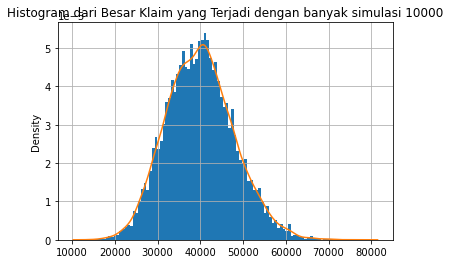

Approksimasi peluangnya adalah 0.106, rata-rata dari besar klaim adalah 39967.69, dan variansi dari klaim adalah 62259041.9537 dengan banyak simulasi 10000


In [3]:
prob(sim = 10000)

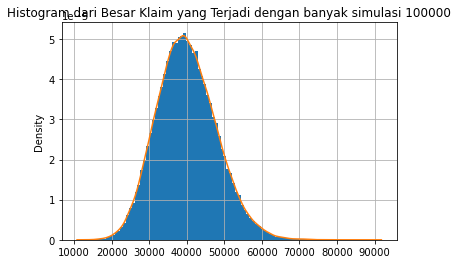

Approksimasi peluangnya adalah 0.1065, rata-rata dari besar klaim adalah 39978.3654, dan variansi dari klaim adalah 62474694.1288 dengan banyak simulasi 100000


In [4]:
prob(sim=100000)

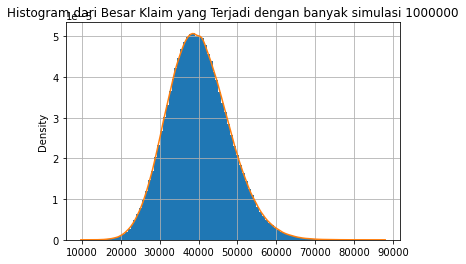

Approksimasi peluangnya adalah 0.1067, rata-rata dari besar klaim adalah 39996.7586, dan variansi dari klaim adalah 62328969.9228 dengan banyak simulasi 1000000


In [5]:
prob(sim=1000000)